# Space Brother

Google Drive Link : https://drive.google.com/drive/folders/1zlbsCXZpxFX5EnbzK4E4fji59ydp8KWY?usp=drive_link

## Project Description

The main dataset contains information about the events experienced by players in the mobile game "Space Brothers."

The primary monetization strategy for this game is still in the planning stage. The company anticipates that, in the future, the application will display a variety of ads on the screen when users choose the type of object to build.

The available dataset includes data about users at the first level of the game. To progress to the second level, players must undertake one of the following activities:

- Defeat the first boss.
- Build an assembly system for orbiting satellites.

### Project Goals

Several project objectives can be derived from this dataset:

- Identify the most profitable sources of ads for user acquisition.
- Optimize costs for maximum user results.
- Determine the opportune moments for ad monetization.

### Defining Project Details and Limits

As for some limitations in the project that we need to be aware of:

The results of this project will be presented to top management.
If the provided data is incomplete, relevant references can be used to supplement the parameters.

### Project Reference

Reference: https://www.niagahoster.co.id/blog/jenis-iklan-online/

Benefits of Using Online Marketing to Acquire Users:

1. Measurable Ads: Online ads make it easy to analyze. You can clearly monitor the effectiveness of ads, including reach, costs, and your ad target. Advertising platforms provide various data reporting that you can analyze to determine your next ad target.
2. Diverse Formats of Online Ads: Online ads have the advantage of freedom in determining the types and formats of ads. You can use images, videos, text, and combinations of these according to your needs.
Reference: https://id-id.facebook.com/audiencenetwork/news-and-insights/winning-strategies-for-monetizing-your-game-with-ads

Strategies for Success in Monetizing Your Game with Ads:

The Right Moment to Insert Ads in the Game to Boost Revenue:
1. Discovery Phase: Players tend to pay more attention to ads during the discovery mode; during activities that are not the main focus of the application. For example, ads can be integrated to appear when players view the notification tab. As this is an action initiated by the user, ad discovery placement can be especially beneficial in helping to drive conversions.
2. Post-Task: The pause during ad interaction is when game players tend to start paying attention to an ad. For example, displaying ads when someone has completed an action, such as clearing memory.

### Hypothesis Proposal

Hypotheses that can be tested:

1. Hypothesis regarding the difference in completion time for a level between users who **complete the level with a project** and those who complete it by **defeating other players**.
2. Hypothesis regarding the difference in the average **number of buildings constructed by users** who **complete the level through a project and by defeating other players.**

### Turning Hypotheses into Action Plans

- calculate the minimum and maximum time for each type of building and activity to complete the boss for each user
- calculate the total time spent by each user on each type of activity
- calculate the average time required to build each type of building and defeat the boss for each user
- analyze the average time spent for inserting advertisements.

### Adding Mandatory Analysis Steps

To complete the project, we need mandatory steps that must be taken before concluding our goals and hypotheses:

how about this:

* Data Preprocessing:

    - Study missing values
    - Study data types
    - Study duplicate values
    - Remove duplicates
    - Convert data types
    - Replace missing values

* Exploratory Data Analysis:

    - Customer Acquisition Cost Analysis
    - Analyze the time spent on events by users and study it

* Identifying the relationship between the source and user outcomes for each event/building type

### Drawing Conclusions and Planning What to Take Next

The conclusion we will analyze later is which ad source is effective for advertising. We will look at the CAC, choosing at least the three most cost-effective sources to optimize. Then, we'll analyze the users who complete the project from which source and the average time they spend. In the end, we will monetize ads to the right users.

The plan we will take to achieve these goals is to first combine the cost and event datasets. We will find users obtained from advertising costs and determine which performs best.

## Pre-Process Data

### Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns


### Data Reviews

#### Event Data

Let's open Event Data

In [2]:
df_event = pd.read_csv('games/events_us.csv')
df_event

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN
...,...,...,...,...,...
135635,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135637,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN


In [3]:
df_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


In [4]:
df_event.describe()

,event_datetime,event,building_type,user_id,project_type
count,135640,135640,127957,135640,1866
unique,128790,3,3,13576,1
top,2020-05-09 12:35:56,building,spaceport,ff841992-d93b-462e-bc6e-18c24a514f36,satellite_orbital_assembly
freq,4,127957,59325,22,1866


In [5]:
title_column = ['event','building_type','project_type']

for column in title_column:
    print(df_event[column].value_counts())
    print()
    

building            127957
finished_stage_1      5817
project               1866
Name: event, dtype: int64

spaceport          59325
assembly_shop      54494
research_center    14138
Name: building_type, dtype: int64

satellite_orbital_assembly    1866
Name: project_type, dtype: int64



There is a data type mismatch in the event_datetime; we need to change it as before. Additionally, there is missing data in building_type and project type, which needs further investigation.

In [6]:
df_event['event_datetime'] = pd.to_datetime(df_event['event_datetime'])
df_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135640 non-null  datetime64[ns]
 1   event           135640 non-null  object        
 2   building_type   127957 non-null  object        
 3   user_id         135640 non-null  object        
 4   project_type    1866 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 5.2+ MB


We need to check if there are any duplicate data.

In [7]:
df_event[df_event.duplicated()]

,event_datetime,event,building_type,user_id,project_type
74891,2020-05-10 18:41:56,building,research_center,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN


There is one data that we need to remove.

In [8]:
df_event = df_event.drop_duplicates()
df_event.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135639 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135639 non-null  datetime64[ns]
 1   event           135639 non-null  object        
 2   building_type   127956 non-null  object        
 3   user_id         135639 non-null  object        
 4   project_type    1866 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 6.2+ MB


There are 2 columns with missing data. We need to study and check each one.

**building_type**

In [9]:
building_type_nan = df_event[df_event['building_type'].isna()]
building_type_nan

,event_datetime,event,building_type,user_id,project_type
6659,2020-05-04 19:47:29,finished_stage_1,NaN,ced7b368-818f-48f6-9461-2346de0892c5,NaN
13134,2020-05-05 13:22:09,finished_stage_1,NaN,7ef7fc89-2779-46ea-b328-9e5035b83af5,NaN
15274,2020-05-05 18:54:37,finished_stage_1,NaN,70db22b3-c2f4-43bc-94ea-51c8d2904a29,NaN
16284,2020-05-05 21:27:29,finished_stage_1,NaN,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,NaN
19650,2020-05-06 06:02:22,finished_stage_1,NaN,58e077ba-feb1-4556-a5a0-d96bd04efa39,NaN
...,...,...,...,...,...
135632,2020-06-04 15:50:38,finished_stage_1,NaN,22cce310-fe10-41a2-941b-9c3d63327fea,NaN
135633,2020-06-04 17:56:14,finished_stage_1,NaN,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN


If we look at all the events, they are all 'finished_stage_1'. Let's check if there are any values other than that.

In [10]:
title_column_event_nan = ['event','building_type','project_type']

for column in title_column_event_nan:
    print(building_type_nan[column].value_counts())
    print()
    

finished_stage_1    5817
project             1866
Name: event, dtype: int64

Series([], Name: building_type, dtype: int64)

satellite_orbital_assembly    1866
Name: project_type, dtype: int64



Let's open the 'project' event.

In [11]:
building_type_nan[building_type_nan['event'] == 'project']

,event_datetime,event,building_type,user_id,project_type
47121,2020-05-08 18:10:25,project,NaN,e3c66498-9d45-4000-9392-f81e6796e7da,satellite_orbital_assembly
57398,2020-05-09 13:49:11,project,NaN,936e7af6-8338-4703-a1df-fc6c3f5b8e34,satellite_orbital_assembly
58797,2020-05-09 16:19:33,project,NaN,a4491c86-c498-4f74-a56e-65c136d0e9a1,satellite_orbital_assembly
61174,2020-05-09 20:29:01,project,NaN,85d9e675-562b-4329-8bbd-14d3b39096be,satellite_orbital_assembly
63770,2020-05-10 00:57:47,project,NaN,1889ca71-3c57-4e61-9ea6-a711971bbf0a,satellite_orbital_assembly
...,...,...,...,...,...
135602,2020-06-02 03:04:42,project,NaN,9d98001c-7e14-40d7-896e-46b3047365fd,satellite_orbital_assembly
135603,2020-06-02 06:21:03,project,NaN,df4a1e13-eba9-4928-a7cf-ee303d6f80f9,satellite_orbital_assembly
135609,2020-06-02 17:17:28,project,NaN,82e46f34-e243-4728-8e20-2e171fc33ea4,satellite_orbital_assembly
135617,2020-06-03 09:46:04,project,NaN,fe032991-71e0-48c5-889f-4c3805ba4c9b,satellite_orbital_assembly


In [12]:
df_event['building_type'].fillna('next_level', inplace=True)
df_event

/opt/conda/lib/python3.9/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN
...,...,...,...,...,...
135635,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
135636,2020-06-05 02:25:12,finished_stage_1,next_level,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135637,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN
135638,2020-06-05 12:12:27,finished_stage_1,next_level,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN


We can see that if the user has completed level 1 and assembled an orbital satellite, the result is 'Nan,' which means it's already completed at level 1. So, we don't need to fill in this empty data. However, for the 'finished stage' event, it may need to be filled in if required later.

**project_type**

In [13]:
project_type_nan = df_event[df_event['project_type'].isna()]
project_type_nan

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN
...,...,...,...,...,...
135635,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
135636,2020-06-05 02:25:12,finished_stage_1,next_level,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135637,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN
135638,2020-06-05 12:12:27,finished_stage_1,next_level,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN


In [14]:
title_column_project_type_nan = ['event','building_type','project_type']

for column in title_column_project_type_nan:
    print(project_type_nan[column].value_counts())
    print()
    

building            127956
finished_stage_1      5817
Name: event, dtype: int64

spaceport          59325
assembly_shop      54494
research_center    14137
next_level          5817
Name: building_type, dtype: int64

Series([], Name: project_type, dtype: int64)



The data above confirms that for those who didn't take the satellite project, the project type is NaN, and the event column only contains 'building' and 'finished_stage_1' events, with no 'project' event. So, there's nothing that needs to be filled in for the missing data in both columns.

#### User Data

In [15]:
df_user = pd.read_csv('games/user_source_us.csv')
df_user

,user_id,event_date,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06,google_play_ads
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05,youtube_channel_network
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05,facebook_ads
...,...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-04,instagram_new_adverts
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,2020-05-04,facebook_ads
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,2020-05-04,google_play_ads
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,2020-05-04,instagram_new_adverts


In [16]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     13576 non-null  object
 1   event_date  13576 non-null  object
 2   source      13576 non-null  object
dtypes: object(3)
memory usage: 318.3+ KB


In [17]:
df_user.describe()

,user_id,event_date,source
count,13576,13576,13576
unique,13576,7,4
top,24ded4ee-c033-40bd-ad32-4dbf5d69bfbf,2020-05-04,google_play_ads
freq,1,5860,4817


In [18]:
df_user['event_date'] = pd.to_datetime(df_user['event_date'])
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     13576 non-null  object        
 1   event_date  13576 non-null  datetime64[ns]
 2   source      13576 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 318.3+ KB


In [19]:
df_user_col = ['event_date','source']

for column in df_user_col:
    print(df_user[column].value_counts())
    print()

2020-05-04    5860
2020-05-05    3361
2020-05-06    1847
2020-05-07    1109
2020-05-08     688
2020-05-09     440
2020-05-10     271
Name: event_date, dtype: int64

google_play_ads            4817
instagram_new_adverts      3347
facebook_ads               2726
youtube_channel_network    2686
Name: source, dtype: int64



We can see that the most clicks on ads occurred on the 4th, 5th, and 6th days. The majority of users clicked through Google Play Ads.

From this user data, there are no missing data or data type issues. We can proceed.

#### Ads Data

In [20]:
df_ads = pd.read_csv('games/ad_costs_us.csv')
df_ads

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796
5,facebook_ads,2020-05-08,68.009276
6,facebook_ads,2020-05-09,38.723350
7,instagram_new_adverts,2020-05-03,943.204717
8,instagram_new_adverts,2020-05-04,502.925451
9,instagram_new_adverts,2020-05-05,313.970984


In [21]:
df_ads['day'] = pd.to_datetime(df_ads['day'])
df_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   source  28 non-null     object        
 1   day     28 non-null     datetime64[ns]
 2   cost    28 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 800.0+ bytes


For the ads data, there are no issues regarding duplicates or missing data. We can proceed to exploratory data analysis.

## Exploration Data Analysis

### Customer Aquisition Cost Analysis

In [22]:
df_user

,user_id,event_date,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06,google_play_ads
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05,youtube_channel_network
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05,facebook_ads
...,...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-04,instagram_new_adverts
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,2020-05-04,facebook_ads
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,2020-05-04,google_play_ads
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,2020-05-04,instagram_new_adverts


In [23]:
df_customer_source = df_user.groupby(['source','event_date']).agg({'user_id':'count'}).reset_index()
df_customer_source = df_customer_source.rename(columns={'event_date': 'day'})
df_customer_source

,source,day,user_id
0,facebook_ads,2020-05-04,1184
1,facebook_ads,2020-05-05,694
2,facebook_ads,2020-05-06,345
3,facebook_ads,2020-05-07,224
4,facebook_ads,2020-05-08,139
5,facebook_ads,2020-05-09,84
6,facebook_ads,2020-05-10,56
7,google_play_ads,2020-05-04,2078
8,google_play_ads,2020-05-05,1208
9,google_play_ads,2020-05-06,664


In [24]:
df_ads

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796
5,facebook_ads,2020-05-08,68.009276
6,facebook_ads,2020-05-09,38.723350
7,instagram_new_adverts,2020-05-03,943.204717
8,instagram_new_adverts,2020-05-04,502.925451
9,instagram_new_adverts,2020-05-05,313.970984


After that, we will merge based on source and day

In [25]:
df_cac = df_ads.merge(df_customer_source , on =['source','day',])
df_cac['cac'] = df_cac['cost']/df_cac['user_id']
df_cac

,source,day,cost,user_id,cac
0,facebook_ads,2020-05-04,548.354480,1184,0.463137
1,facebook_ads,2020-05-05,260.185754,694,0.374907
2,facebook_ads,2020-05-06,177.982200,345,0.515890
3,facebook_ads,2020-05-07,111.766796,224,0.498959
4,facebook_ads,2020-05-08,68.009276,139,0.489275
5,facebook_ads,2020-05-09,38.723350,84,0.460992
6,instagram_new_adverts,2020-05-04,502.925451,1452,0.346367
7,instagram_new_adverts,2020-05-05,313.970984,796,0.394436
8,instagram_new_adverts,2020-05-06,173.071145,472,0.366676
9,instagram_new_adverts,2020-05-07,109.915254,270,0.407094


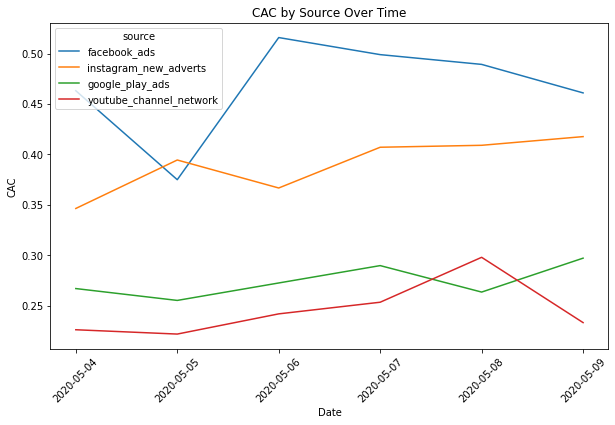

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cac, x='day', y='cac', hue='source')
plt.title('CAC by Source Over Time')
plt.xlabel('Date')
plt.ylabel('CAC')
plt.xticks(rotation=45)

plt.show()

We can see from the above graph that the CAC is quite variable, but each different source has a similar pattern. Over time, there is no significant difference in CAC values. However, there is a difference in CAC values based on the source, with YouTube and Google having the lowest costs and Facebook and Instagram having significantly higher CAC.

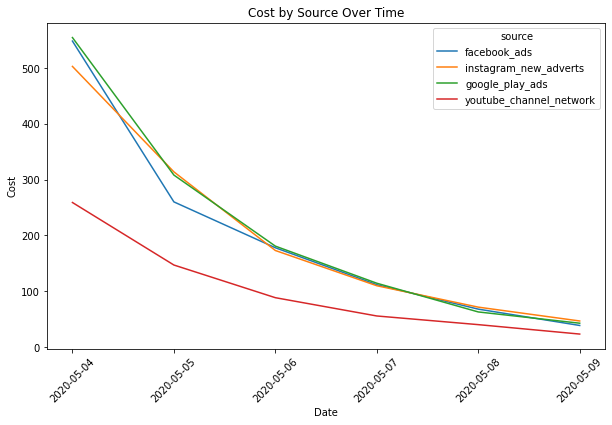

In [27]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cac, x='day', y='cost', hue='source')
plt.title('Cost by Source Over Time')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.xticks(rotation=45)

plt.show()

We can see from the above graph the correlation between cost and time. Over time, the cost used decreases exponentially, but at the beginning of the month, the ad budget for YouTube is the smallest.

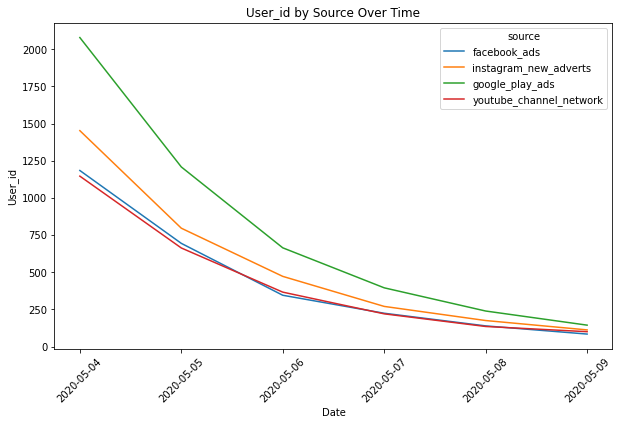

In [28]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cac, x='day', y='user_id', hue='source')
plt.title('User_id by Source Over Time')
plt.xlabel('Date')
plt.ylabel('User_id')
plt.xticks(rotation=45)

plt.show()

We can see from the above graph the users acquired over time, and the trend shows a decrease exponentially. On the first day, Google occupies the highest position in acquiring customers compared to other sources.

Now let's try grouping based on the source alone.

In [29]:
df_cac_1 = df_cac.groupby('source').agg({'cost':'sum','user_id':'sum'})
df_cac_1['cac'] = df_cac_1['cost']/df_cac_1['user_id']
df_cac_1 = df_cac_1.reset_index()
df_cac_1

,source,cost,user_id,cac
0,facebook_ads,1205.021857,2670,0.451319
1,google_play_ads,1263.972055,4728,0.267338
2,instagram_new_adverts,1218.236973,3277,0.371754
3,youtube_channel_network,613.894261,2630,0.233420


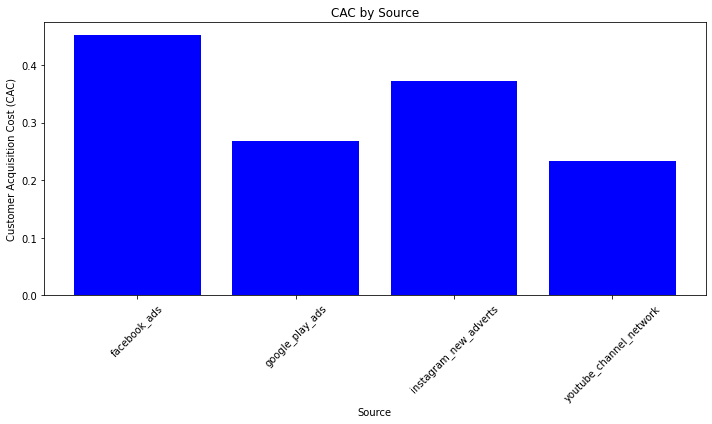

In [30]:
plt.figure(figsize=(10, 6))

plt.bar(df_cac_1['source'], df_cac_1['cac'], color='blue')
plt.xlabel('Source')
plt.ylabel('Customer Acquisition Cost (CAC)')
plt.title('CAC by Source')
plt.xticks(rotation=45)
plt.tight_layout()

From our CAC analysis, for daily data, we can see that increasing spend does not necessarily mean a lower "CAC." There are days when the "CAC" is lower despite higher spending.

For the analysis when we group based on the source alone, we found that the lowest CAC is from the source "youtube_channel_network," with the highest customer acquisition from Google, followed by Instagram. However, the CAC is higher compared to "youtube_channel_network."

### Analysis of the time events passed by users and studying them

In [31]:
df_event

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN
...,...,...,...,...,...
135635,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
135636,2020-06-05 02:25:12,finished_stage_1,next_level,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135637,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN
135638,2020-06-05 12:12:27,finished_stage_1,next_level,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN


In [32]:
df_event['user_id'].value_counts()

ff841992-d93b-462e-bc6e-18c24a514f36    22
bf542075-e3a2-4e79-82d8-3838e86d2a25    22
d6aca06a-cd75-4cd8-b8cd-240a3c163884    22
9307342f-2518-4b04-818e-5c11f4625a5e    21
c133dd1d-c5d0-48e8-aaf7-f654be5b9b56    21
                                        ..
ebfe1d62-9750-483f-b1b1-5c04fd62ee39     1
e49acc01-ccf6-42f8-aab4-9fc6aef66493     1
7ac32352-627b-421c-9319-b77a37947625     1
a27a2f66-c7fc-4933-852c-8ff3d735646b     1
f503e280-dfdd-439b-afcd-af93433aec42     1
Name: user_id, Length: 13576, dtype: int64

There are some users who perform events multiple times. Further analysis is needed.

let's take a sample 1 user id : d6aca06a-cd75-4cd8-b8cd-240a3c163884 

In [33]:
df_event[df_event['user_id'] == 'd6aca06a-cd75-4cd8-b8cd-240a3c163884'].sort_values(by = 'event_datetime')

,event_datetime,event,building_type,user_id,project_type
3436,2020-05-04 10:30:08,building,assembly_shop,d6aca06a-cd75-4cd8-b8cd-240a3c163884,NaN
7535,2020-05-04 22:12:18,building,assembly_shop,d6aca06a-cd75-4cd8-b8cd-240a3c163884,NaN
8682,2020-05-05 01:24:42,building,assembly_shop,d6aca06a-cd75-4cd8-b8cd-240a3c163884,NaN
11407,2020-05-05 08:48:41,building,assembly_shop,d6aca06a-cd75-4cd8-b8cd-240a3c163884,NaN
31301,2020-05-07 09:19:26,building,assembly_shop,d6aca06a-cd75-4cd8-b8cd-240a3c163884,NaN
35448,2020-05-07 18:30:51,building,assembly_shop,d6aca06a-cd75-4cd8-b8cd-240a3c163884,NaN
44878,2020-05-08 13:46:10,building,spaceport,d6aca06a-cd75-4cd8-b8cd-240a3c163884,NaN
49807,2020-05-08 23:26:29,building,spaceport,d6aca06a-cd75-4cd8-b8cd-240a3c163884,NaN
63084,2020-05-09 23:48:52,building,assembly_shop,d6aca06a-cd75-4cd8-b8cd-240a3c163884,NaN
71172,2020-05-10 13:00:12,building,spaceport,d6aca06a-cd75-4cd8-b8cd-240a3c163884,NaN


There are users who frequently appear even though they have completed one of the activities, assembling a satellite or finishing stage 1.

In [34]:
df_user_spent_time = df_event.groupby(['user_id', 'event', 'building_type']).agg({'event_datetime': ['max']})
df_user_spent_time = df_user_spent_time.reset_index()
df_user_spent_time.columns = ['user_id', 'event', 'building_type', 'event_datetime_max']
df_user_spent_time

,user_id,event,building_type,event_datetime_max
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,building,assembly_shop,2020-05-09 17:36:38
1,0001f83c-c6ac-4621-b7f0-8a28b283ac30,building,research_center,2020-05-20 11:26:06
2,0001f83c-c6ac-4621-b7f0-8a28b283ac30,building,spaceport,2020-05-19 02:44:08
3,00151b4f-ba38-44a8-a650-d7cf130a0105,building,assembly_shop,2020-05-09 21:46:24
4,00151b4f-ba38-44a8-a650-d7cf130a0105,building,spaceport,2020-05-18 10:46:52
...,...,...,...,...
42156,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,building,assembly_shop,2020-05-09 20:56:03
42157,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,building,research_center,2020-05-25 07:09:53
42158,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,building,spaceport,2020-05-23 06:00:10
42159,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,finished_stage_1,next_level,2020-05-25 14:05:51


Now, Let's try to join with df_user so we can have more complete data

In [35]:
df_user

,user_id,event_date,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06,google_play_ads
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05,youtube_channel_network
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05,facebook_ads
...,...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-04,instagram_new_adverts
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,2020-05-04,facebook_ads
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,2020-05-04,google_play_ads
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,2020-05-04,instagram_new_adverts


In [36]:
df_user_spent_time = df_user_spent_time.merge(df_user[['user_id', 'source','event_date']], on='user_id', how='left')

In [37]:
df_user_spent_time = df_user_spent_time.rename(columns={'source_y':'source'})
df_user_spent_time

,user_id,event,building_type,event_datetime_max,source,event_date
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,building,assembly_shop,2020-05-09 17:36:38,facebook_ads,2020-05-06
1,0001f83c-c6ac-4621-b7f0-8a28b283ac30,building,research_center,2020-05-20 11:26:06,facebook_ads,2020-05-06
2,0001f83c-c6ac-4621-b7f0-8a28b283ac30,building,spaceport,2020-05-19 02:44:08,facebook_ads,2020-05-06
3,00151b4f-ba38-44a8-a650-d7cf130a0105,building,assembly_shop,2020-05-09 21:46:24,google_play_ads,2020-05-06
4,00151b4f-ba38-44a8-a650-d7cf130a0105,building,spaceport,2020-05-18 10:46:52,google_play_ads,2020-05-06
...,...,...,...,...,...,...
42156,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,building,assembly_shop,2020-05-09 20:56:03,facebook_ads,2020-05-08
42157,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,building,research_center,2020-05-25 07:09:53,facebook_ads,2020-05-08
42158,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,building,spaceport,2020-05-23 06:00:10,facebook_ads,2020-05-08
42159,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,finished_stage_1,next_level,2020-05-25 14:05:51,facebook_ads,2020-05-08


In [38]:
df_user_spent_time['spend_time'] = df_user_spent_time['event_datetime_max'] - df_user_spent_time['event_date']

df_user_spent_time['days'] = df_user_spent_time['spend_time'].dt.days
df_user_spent_time['hours'] = df_user_spent_time['spend_time'].dt.seconds // 3600
df_user_spent_time['minutes'] = (df_user_spent_time['spend_time'].dt.seconds // 60) % 60

df_user_spent_time['total_hours_spend'] = df_user_spent_time['days'] * 24 + df_user_spent_time['hours'] + df_user_spent_time['minutes'] / 60

df_user_spent_time = df_user_spent_time.drop(columns=['days', 'hours', 'minutes'])

df_user_spent_time

,user_id,event,building_type,event_datetime_max,source,event_date,spend_time,total_hours_spend
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,building,assembly_shop,2020-05-09 17:36:38,facebook_ads,2020-05-06,3 days 17:36:38,89.600000
1,0001f83c-c6ac-4621-b7f0-8a28b283ac30,building,research_center,2020-05-20 11:26:06,facebook_ads,2020-05-06,14 days 11:26:06,347.433333
2,0001f83c-c6ac-4621-b7f0-8a28b283ac30,building,spaceport,2020-05-19 02:44:08,facebook_ads,2020-05-06,13 days 02:44:08,314.733333
3,00151b4f-ba38-44a8-a650-d7cf130a0105,building,assembly_shop,2020-05-09 21:46:24,google_play_ads,2020-05-06,3 days 21:46:24,93.766667
4,00151b4f-ba38-44a8-a650-d7cf130a0105,building,spaceport,2020-05-18 10:46:52,google_play_ads,2020-05-06,12 days 10:46:52,298.766667
...,...,...,...,...,...,...,...,...
42156,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,building,assembly_shop,2020-05-09 20:56:03,facebook_ads,2020-05-08,1 days 20:56:03,44.933333
42157,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,building,research_center,2020-05-25 07:09:53,facebook_ads,2020-05-08,17 days 07:09:53,415.150000
42158,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,building,spaceport,2020-05-23 06:00:10,facebook_ads,2020-05-08,15 days 06:00:10,366.000000
42159,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,finished_stage_1,next_level,2020-05-25 14:05:51,facebook_ads,2020-05-08,17 days 14:05:51,422.083333


#### Clean Data for Further Analysis

In [39]:
df_user_spent_time

,user_id,event,building_type,event_datetime_max,source,event_date,spend_time,total_hours_spend
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,building,assembly_shop,2020-05-09 17:36:38,facebook_ads,2020-05-06,3 days 17:36:38,89.600000
1,0001f83c-c6ac-4621-b7f0-8a28b283ac30,building,research_center,2020-05-20 11:26:06,facebook_ads,2020-05-06,14 days 11:26:06,347.433333
2,0001f83c-c6ac-4621-b7f0-8a28b283ac30,building,spaceport,2020-05-19 02:44:08,facebook_ads,2020-05-06,13 days 02:44:08,314.733333
3,00151b4f-ba38-44a8-a650-d7cf130a0105,building,assembly_shop,2020-05-09 21:46:24,google_play_ads,2020-05-06,3 days 21:46:24,93.766667
4,00151b4f-ba38-44a8-a650-d7cf130a0105,building,spaceport,2020-05-18 10:46:52,google_play_ads,2020-05-06,12 days 10:46:52,298.766667
...,...,...,...,...,...,...,...,...
42156,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,building,assembly_shop,2020-05-09 20:56:03,facebook_ads,2020-05-08,1 days 20:56:03,44.933333
42157,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,building,research_center,2020-05-25 07:09:53,facebook_ads,2020-05-08,17 days 07:09:53,415.150000
42158,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,building,spaceport,2020-05-23 06:00:10,facebook_ads,2020-05-08,15 days 06:00:10,366.000000
42159,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,finished_stage_1,next_level,2020-05-25 14:05:51,facebook_ads,2020-05-08,17 days 14:05:51,422.083333


In [40]:
df_user_spent_time['event'].value_counts()

building            34478
finished_stage_1     5817
project              1866
Name: event, dtype: int64

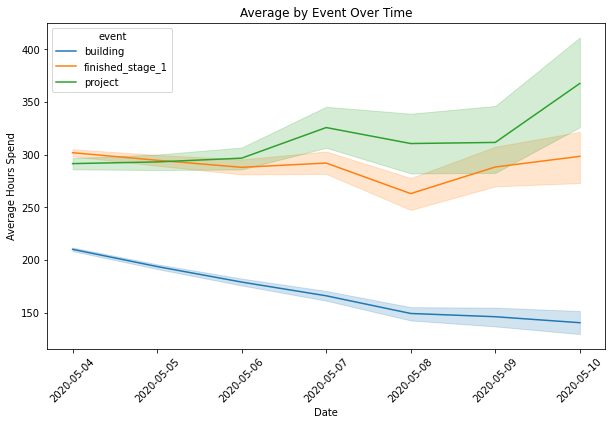

In [41]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_user_spent_time, x='event_date', y=df_user_spent_time['total_hours_spend'], hue='event')
plt.title('Average by Event Over Time')
plt.xlabel('Date')
plt.ylabel('Average Hours Spend')
plt.xticks(rotation=45)

plt.show()

If we look at the graph above, the time spent by users on building structures tends to decrease

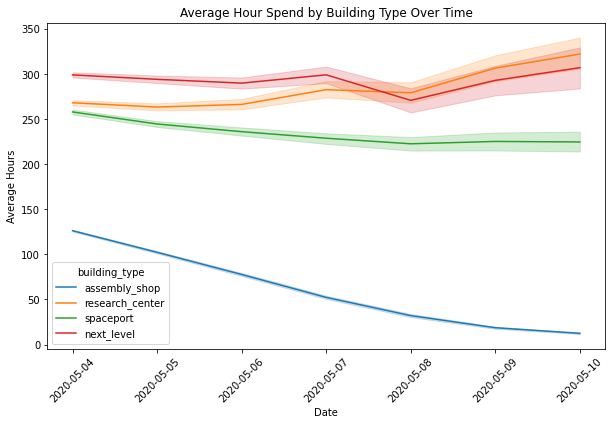

In [42]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_user_spent_time, x='event_date', y='total_hours_spend', hue='building_type')
plt.title('Average Hour Spend by Building Type Over Time')
plt.xlabel('Date')
plt.ylabel('Average Hours')
plt.xticks(rotation=45)

plt.show()

For the buildings themselves, users spend the most time on the research center, followed by the spaceport and assembly shop. Perhaps the assembly shop is the easiest to build compared to other structures.

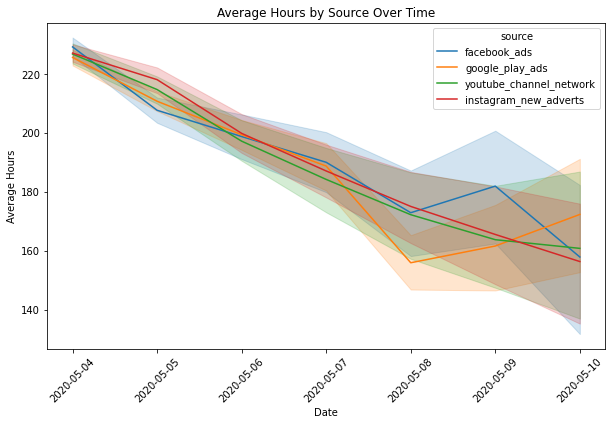

In [43]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_user_spent_time, x='event_date', y='total_hours_spend', hue='source')
plt.title('Average Hours by Source Over Time')
plt.xlabel('Date')
plt.ylabel('Average Hours')
plt.xticks(rotation=45)

plt.show()

If we look at the above graph, the average time spent by users based on the source tends to decrease because user acquisition also decreases, as seen in the previous graph.

#### Event "building" Analysis

In [44]:
df_final_event_build = df_user_spent_time[df_user_spent_time['event'] == 'building']
df_final_event_build

,user_id,event,building_type,event_datetime_max,source,event_date,spend_time,total_hours_spend
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,building,assembly_shop,2020-05-09 17:36:38,facebook_ads,2020-05-06,3 days 17:36:38,89.600000
1,0001f83c-c6ac-4621-b7f0-8a28b283ac30,building,research_center,2020-05-20 11:26:06,facebook_ads,2020-05-06,14 days 11:26:06,347.433333
2,0001f83c-c6ac-4621-b7f0-8a28b283ac30,building,spaceport,2020-05-19 02:44:08,facebook_ads,2020-05-06,13 days 02:44:08,314.733333
3,00151b4f-ba38-44a8-a650-d7cf130a0105,building,assembly_shop,2020-05-09 21:46:24,google_play_ads,2020-05-06,3 days 21:46:24,93.766667
4,00151b4f-ba38-44a8-a650-d7cf130a0105,building,spaceport,2020-05-18 10:46:52,google_play_ads,2020-05-06,12 days 10:46:52,298.766667
...,...,...,...,...,...,...,...,...
42154,ffff194a-56b7-4c12-860d-3485242ae7f5,building,assembly_shop,2020-05-10 09:19:35,instagram_new_adverts,2020-05-04,6 days 09:19:35,153.316667
42155,ffff194a-56b7-4c12-860d-3485242ae7f5,building,spaceport,2020-05-11 22:04:30,instagram_new_adverts,2020-05-04,7 days 22:04:30,190.066667
42156,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,building,assembly_shop,2020-05-09 20:56:03,facebook_ads,2020-05-08,1 days 20:56:03,44.933333
42157,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,building,research_center,2020-05-25 07:09:53,facebook_ads,2020-05-08,17 days 07:09:53,415.150000


In [45]:
df_final_event_build_avg_spend = df_final_event_build.groupby(['building_type']).agg({'user_id':'count','total_hours_spend':'sum'})
df_final_event_build_avg_spend = df_final_event_build_avg_spend.reset_index()
df_final_event_build_avg_spend['spent_avg_per_user'] = (df_final_event_build_avg_spend['total_hours_spend'] / df_final_event_build_avg_spend['user_id'])
df_final_event_build_avg_spend

,building_type,user_id,total_hours_spend,spent_avg_per_user
0,assembly_shop,13576,1.318753e+06,97.138572
1,research_center,7671,2.064447e+06,269.123637
2,spaceport,13231,3.252215e+06,245.802624


In [46]:
df_final_event_build_avg_spend_source = df_final_event_build.groupby(['source']).agg({'user_id':'count','total_hours_spend':'sum'})
df_final_event_build_avg_spend_source = df_final_event_build_avg_spend_source.reset_index()
df_final_event_build_avg_spend_source['spent_avg_per_user'] = (df_final_event_build_avg_spend_source['total_hours_spend'] / df_final_event_build_avg_spend_source['user_id'])
df_final_event_build_avg_spend_source

,source,user_id,total_hours_spend,spent_avg_per_user
0,facebook_ads,6967,1.348252e+06,193.519678
1,google_play_ads,12227,2.343698e+06,191.682147
2,instagram_new_adverts,8521,1.649730e+06,193.607575
3,youtube_channel_network,6763,1.293736e+06,191.296143


From the above building data, it can be seen that users build assembly_shop more frequently, followed by space_port and research_center. The longest time they spend is on building a spaceport.

For the source, there is no significant difference in user spend time. However, as mentioned earlier, google_play_ads is the best source so far for customer acquisition.

#### Event "project" Analysis

In [47]:
df_final_event_project= df_user_spent_time[df_user_spent_time['event'] == 'project']
df_final_event_project

,user_id,event,building_type,event_datetime_max,source,event_date,spend_time,total_hours_spend
42,006380d6-67a6-45de-ab1e-6eb54ad8dbe8,project,next_level,2020-05-16 02:43:11,youtube_channel_network,2020-05-04,12 days 02:43:11,290.716667
76,00be7371-fa79-4fbd-b8e7-8ba32e3f8f82,project,next_level,2020-05-21 00:01:46,instagram_new_adverts,2020-05-08,13 days 00:01:46,312.016667
84,00c2b9f2-2615-439c-aed0-6974e4c6c1c1,project,next_level,2020-05-26 13:36:50,youtube_channel_network,2020-05-07,19 days 13:36:50,469.600000
105,00de2809-403e-4476-a2f7-ca1b11700190,project,next_level,2020-05-18 09:33:27,instagram_new_adverts,2020-05-04,14 days 09:33:27,345.550000
114,00e83261-5fd4-4939-9616-802b5a0202c6,project,next_level,2020-05-17 09:23:11,google_play_ads,2020-05-05,12 days 09:23:11,297.383333
...,...,...,...,...,...,...,...,...
42054,ff50f63a-c4b3-494e-8bf9-3f19dbfc513e,project,next_level,2020-05-21 22:14:23,facebook_ads,2020-05-04,17 days 22:14:23,430.233333
42065,ff60fcd1-4329-494e-b82d-461fbdf5b5eb,project,next_level,2020-05-10 15:04:18,facebook_ads,2020-05-05,5 days 15:04:18,135.066667
42086,ff83bdd8-f49a-49fd-8aad-9fa1fb30d516,project,next_level,2020-05-14 19:28:26,youtube_channel_network,2020-05-04,10 days 19:28:26,259.466667
42091,ff841992-d93b-462e-bc6e-18c24a514f36,project,next_level,2020-05-15 06:49:54,youtube_channel_network,2020-05-05,10 days 06:49:54,246.816667


In [48]:
df_final_event_project_group = df_final_event_project.groupby('source').agg({'user_id':'count'})
df_final_event_project_group.reset_index()

,source,user_id
0,facebook_ads,391
1,google_play_ads,620
2,instagram_new_adverts,476
3,youtube_channel_network,379


#### Event "finished_stage_1" Analysis

In [49]:
df_final_event_finished_1 = df_user_spent_time[df_user_spent_time['event'] == 'finished_stage_1']
df_final_event_finished_1

,user_id,event,building_type,event_datetime_max,source,event_date,spend_time,total_hours_spend
9,001d39dc-366c-4021-9604-6a3b9ff01e25,finished_stage_1,next_level,2020-05-12 07:40:47,instagram_new_adverts,2020-05-05,7 days 07:40:47,175.666667
18,003ee7e8-6356-4286-a715-62f22a18d2a1,finished_stage_1,next_level,2020-05-17 21:47:49,instagram_new_adverts,2020-05-05,12 days 21:47:49,309.783333
22,004074f8-251a-4776-922c-8348dca1a2f6,finished_stage_1,next_level,2020-05-16 19:57:40,facebook_ads,2020-05-04,12 days 19:57:40,307.950000
27,00464e5e-28ed-4be6-bf44-517ef7b3937b,finished_stage_1,next_level,2020-05-15 16:02:01,google_play_ads,2020-05-04,11 days 16:02:01,280.033333
30,0056c007-c082-43cc-bdef-afc49bca4cb9,finished_stage_1,next_level,2020-05-16 13:48:39,instagram_new_adverts,2020-05-10,6 days 13:48:39,157.800000
...,...,...,...,...,...,...,...,...
42137,ffd002f3-3545-423e-8dba-0c6a2d48a3aa,finished_stage_1,next_level,2020-05-19 04:03:24,google_play_ads,2020-05-06,13 days 04:03:24,316.050000
42142,ffe810f4-1a1f-464b-924d-6f120b0cb8df,finished_stage_1,next_level,2020-05-18 02:03:36,youtube_channel_network,2020-05-04,14 days 02:03:36,338.050000
42146,ffef4fed-164c-40e1-bde1-3980f76d0fb5,finished_stage_1,next_level,2020-05-11 22:15:54,instagram_new_adverts,2020-05-04,7 days 22:15:54,190.250000
42153,fffb626c-5ab6-47c9-8113-2062a2f18494,finished_stage_1,next_level,2020-05-12 13:01:52,google_play_ads,2020-05-04,8 days 13:01:52,205.016667


In [50]:
df_final_event_finished_1_group = df_final_event_finished_1.groupby('source').agg({'user_id':'count'})
df_final_event_finished_1_group.reset_index()

,source,user_id
0,facebook_ads,1150
1,google_play_ads,2042
2,instagram_new_adverts,1466
3,youtube_channel_network,1159


The data results from finished stage 1 and project (building a satellite). These events indicate that the game has been completed. This means that if we want to insert advertisements, we can use the opportunity after the project is completed.

## Hyphothesis Test

In [51]:
df_user_spent_time

,user_id,event,building_type,event_datetime_max,source,event_date,spend_time,total_hours_spend
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,building,assembly_shop,2020-05-09 17:36:38,facebook_ads,2020-05-06,3 days 17:36:38,89.600000
1,0001f83c-c6ac-4621-b7f0-8a28b283ac30,building,research_center,2020-05-20 11:26:06,facebook_ads,2020-05-06,14 days 11:26:06,347.433333
2,0001f83c-c6ac-4621-b7f0-8a28b283ac30,building,spaceport,2020-05-19 02:44:08,facebook_ads,2020-05-06,13 days 02:44:08,314.733333
3,00151b4f-ba38-44a8-a650-d7cf130a0105,building,assembly_shop,2020-05-09 21:46:24,google_play_ads,2020-05-06,3 days 21:46:24,93.766667
4,00151b4f-ba38-44a8-a650-d7cf130a0105,building,spaceport,2020-05-18 10:46:52,google_play_ads,2020-05-06,12 days 10:46:52,298.766667
...,...,...,...,...,...,...,...,...
42156,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,building,assembly_shop,2020-05-09 20:56:03,facebook_ads,2020-05-08,1 days 20:56:03,44.933333
42157,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,building,research_center,2020-05-25 07:09:53,facebook_ads,2020-05-08,17 days 07:09:53,415.150000
42158,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,building,spaceport,2020-05-23 06:00:10,facebook_ads,2020-05-08,15 days 06:00:10,366.000000
42159,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,finished_stage_1,next_level,2020-05-25 14:05:51,facebook_ads,2020-05-08,17 days 14:05:51,422.083333


### Hipotesis Test 1

- H0 (Null Hypothesis): The average time to complete a level through a project is equal to the average time to complete a level by defeating an enemy.
- H1 (Alternative Hypothesis): The average time to complete a level through a project is not equal to the average time to complete a level by defeating an enemy.

We need to seperate the dataset into 2 groups:
1. group that complete the level through project
2. group that complete the level by defeating boss / other users

In [52]:
df_project = df_user_spent_time[df_user_spent_time['event'] == 'project']
combine = df_user_spent_time['user_id'].isin(df_project['user_id'])
projects = df_user_spent_time[combine]
projects

,user_id,event,building_type,event_datetime_max,source,event_date,spend_time,total_hours_spend
38,006380d6-67a6-45de-ab1e-6eb54ad8dbe8,building,assembly_shop,2020-05-10 07:13:51,youtube_channel_network,2020-05-04,6 days 07:13:51,151.216667
39,006380d6-67a6-45de-ab1e-6eb54ad8dbe8,building,research_center,2020-05-12 11:30:16,youtube_channel_network,2020-05-04,8 days 11:30:16,203.500000
40,006380d6-67a6-45de-ab1e-6eb54ad8dbe8,building,spaceport,2020-05-13 13:26:18,youtube_channel_network,2020-05-04,9 days 13:26:18,229.433333
41,006380d6-67a6-45de-ab1e-6eb54ad8dbe8,finished_stage_1,next_level,2020-05-16 11:22:33,youtube_channel_network,2020-05-04,12 days 11:22:33,299.366667
42,006380d6-67a6-45de-ab1e-6eb54ad8dbe8,project,next_level,2020-05-16 02:43:11,youtube_channel_network,2020-05-04,12 days 02:43:11,290.716667
...,...,...,...,...,...,...,...,...
42156,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,building,assembly_shop,2020-05-09 20:56:03,facebook_ads,2020-05-08,1 days 20:56:03,44.933333
42157,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,building,research_center,2020-05-25 07:09:53,facebook_ads,2020-05-08,17 days 07:09:53,415.150000
42158,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,building,spaceport,2020-05-23 06:00:10,facebook_ads,2020-05-08,15 days 06:00:10,366.000000
42159,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,finished_stage_1,next_level,2020-05-25 14:05:51,facebook_ads,2020-05-08,17 days 14:05:51,422.083333


In [53]:
projects['total_hours_spend'].mean()

256.7040192926045

In [54]:
df_boss= df_user_spent_time[df_user_spent_time['event'] == 'finished_stage_1']
combine_boss = df_user_spent_time['user_id'].isin(df_boss['user_id'])
boss = df_user_spent_time[combine_boss]
boss

,user_id,event,building_type,event_datetime_max,source,event_date,spend_time,total_hours_spend
7,001d39dc-366c-4021-9604-6a3b9ff01e25,building,assembly_shop,2020-05-08 14:53:14,instagram_new_adverts,2020-05-05,3 days 14:53:14,86.883333
8,001d39dc-366c-4021-9604-6a3b9ff01e25,building,spaceport,2020-05-12 04:14:25,instagram_new_adverts,2020-05-05,7 days 04:14:25,172.233333
9,001d39dc-366c-4021-9604-6a3b9ff01e25,finished_stage_1,next_level,2020-05-12 07:40:47,instagram_new_adverts,2020-05-05,7 days 07:40:47,175.666667
15,003ee7e8-6356-4286-a715-62f22a18d2a1,building,assembly_shop,2020-05-09 14:56:55,instagram_new_adverts,2020-05-05,4 days 14:56:55,110.933333
16,003ee7e8-6356-4286-a715-62f22a18d2a1,building,research_center,2020-05-17 05:23:21,instagram_new_adverts,2020-05-05,12 days 05:23:21,293.383333
...,...,...,...,...,...,...,...,...
42156,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,building,assembly_shop,2020-05-09 20:56:03,facebook_ads,2020-05-08,1 days 20:56:03,44.933333
42157,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,building,research_center,2020-05-25 07:09:53,facebook_ads,2020-05-08,17 days 07:09:53,415.150000
42158,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,building,spaceport,2020-05-23 06:00:10,facebook_ads,2020-05-08,15 days 06:00:10,366.000000
42159,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,finished_stage_1,next_level,2020-05-25 14:05:51,facebook_ads,2020-05-08,17 days 14:05:51,422.083333


In [55]:
boss['total_hours_spend'].mean()

233.3124296914948

In [60]:
project_time = projects['total_hours_spend']
boss_time = boss['total_hours_spend']

alpha = 0.05 

results = st.ttest_ind(project_time, boss_time)
print('P-value:', results.pvalue)

if results.pvalue < alpha:
    print("There is a statistically significant difference!")
else:
    print("There is no statistical difference in completion time.")


P-value: 2.1852695510288922e-64
There is a statistically significant difference!


With a very low p-value, we can confidently say that there is a significant difference in the time required to complete levels between users who choose the project strategy and those who choose the boss-defeating strategy.

### Pengujian Hipotesis 2

- H0 (Null Hypothesis): There is no difference in the average **number of buildings constructed by users** who **complete levels through projects and by defeating other players.**
- H1 (Alternative Hypothesis): There is a difference in the average **number of buildings constructed by users** who **complete levels through projects and by defeating other players.**

In [57]:
df_project_build = projects.groupby('user_id').agg({'building_type':'count'}).reset_index().sort_values('building_type', ascending = False)
df_project_build

,user_id,building_type
0,006380d6-67a6-45de-ab1e-6eb54ad8dbe8,5
1239,a663b989-68e1-44ea-a1b4-1b92fcf19c10,5
1251,a80f9a17-4c62-4367-8e25-6c0a4414c2fe,5
1250,a7f92e27-1612-408e-902c-f4fb4f7929df,5
1249,a7dcbb7e-e3b7-4b81-b5f5-3577286eea44,5
...,...,...
618,51d1a7a1-a66d-4c7e-8a91-632ad7911877,5
617,51abf511-115e-4d94-94c5-35a70ae730c8,5
616,518ca98d-ec5d-439c-bbc2-a56c42e84787,5
615,518b43ae-2952-4438-933e-b53f5d5062d1,5


In [58]:
df_boss_build = boss.groupby('user_id').agg({'building_type':'count'}).reset_index().sort_values('building_type', ascending = False)
df_boss_build

,user_id,building_type
5816,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,5
1371,3a22e068-4d1b-4168-a851-4581e4ef637e,5
1368,39eddc0c-47be-4a85-b754-a60c0b9bbc2b,5
1367,39ebcf70-e56e-4482-893b-44d1367272f0,5
1365,39e0d1fd-839e-4f90-8a65-049bf3b6ef08,5
...,...,...
2079,5ae0ea10-8411-4642-872a-21adb57ae0f4,2
4067,b27ae5e5-1df7-4eb1-8609-b7828148476c,2
2749,78c4c3f9-8561-4b41-9051-6ac9b7b03dd1,2
2464,6d08f528-d44b-44f8-acda-55f03b278768,2


In [59]:
project_build = df_project_build['building_type']
boss_build = df_boss_build['building_type']

alpha = 0.05

results = st.ttest_ind(project_build, boss_build)
print('Nilai p:', results.pvalue)

if results.pvalue < alpha:
    print("terdapat perbedaan statistik signifikan!")
else:
    print("tidak ada perbadaan statistik dalam waktu penyelesaian")

Nilai p: 0.0
terdapat perbedaan statistik signifikan!


## Kesimpulan

The conclusions from the analyzed project are as follows:

- The advertising sources with the lowest CAC throughout the period are youtube_channel_network and google_play_ads.
- The largest number of customers is acquired through google_play_ads, followed by Instagram. However, Instagram has a relatively high CAC, and youtube_channel_network acquires fewer users than Instagram. Therefore, Google is the source with effective advertising performance.
- Regarding user demographics, the average time spent on building events decreases over time compared to projects/boss events. Therefore, for optimization, we can target users who prefer boss/project events.
- If focusing on building events, the advertising strategy can prioritize the sequence: research center, spaceport, assembly shop.
- To monetize ads, offering additional in-game rewards after ad views can be effective. The order should consider spending time, with the highest bonus rewards for the longest spent time.